<a href="https://colab.research.google.com/github/pritishma-shakya/Concepts-and-Technologies-of-AI/blob/main/2408412_PritishmaShakya_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing the modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, f_regression
from xgboost import XGBRegressor

#1. Exploratory Data Analysis and Data Understanding [5]:
1. Choosing a Dataset:

  • Select a dataset of your choice that interests you and aligns with one of the United Nations Sustainable Development Goals (UNSDG).

  Ans: The name of the dataset is "wind_dataset.csv". It aligns with SDG 7: Affordable and Clean Energy.

  • Load the dataset into a DataFrame object using the Pandas library.


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Portfolio/wind_dataset.csv')

  • Perform an initial analysis to gather a detailed description of the dataset. For example:

  (a) When and by whom was the dataset created?

  Ans: The dataset was created by the user fedesoriano 3 years ago.

  (b) How did you access the dataset?

  Ans: The dataset was accessed through Kaggle.

  (c) How does it align with the chosen UNSDG?

  Ans: It aligns with SDG 7: Affordable and Clean Energy, as it focuses on predicting the wind speed, which is crucial for the development of wind energy

  (d) List all the attributes (columns) present in the dataset.



In [4]:
print("The attributes present in the dataset: ")
print(df.columns.tolist())

The attributes present in the dataset: 
['DATE', 'WIND', 'IND', 'RAIN', 'IND.1', 'T.MAX', 'IND.2', 'T.MIN', 'T.MIN.G']


  • Identify potential questions that the dataset could help answer.
  1.   How do different weather variables influence wind speed?
  2.   How does wind speed vary with different times of the day or seasons?


In [5]:
print("Missing or null values: ")
print(df.isnull().sum())

Missing or null values: 
DATE         0
WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
dtype: int64



  • Assess the dataset’s suitability for analysis (e.g., data completeness, relevance, and quality).
  1.   Completeness: The dataset has many missing values but no duplicate values. The missing values can be addressed by removing them.
  2.   Relevance: The dataset is designed for wind speed prediction, making it relevant to the task. However, the features are not strongly correlated with the target variable "WIND", limiting predictive power.
  3. Quality: The dataset does not contain obvious errors or inconsistences. But the features correlation with the target variable is weak.
  


#2. Conducting Exploratory Data Analysis (EDA):
• Understanding the characteristics of the data beforehand is crucial for building a model withacceptable performance. Before proceeding to build, train, and test the model, write code toinspect, preview, summarize, explore, and visualize your data. For example:



- Data Inspection

In [6]:
print("Number of rows: ",df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows:  6574
Number of columns:  9


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB
None


(a) Perform data cleaning and compute summary statistics for the dataset.



In [8]:
df = df.dropna()

In [9]:
print("Missing or null values after removal: ")
print(df.isnull().sum())

Missing or null values after removal: 
DATE       0
WIND       0
IND        0
RAIN       0
IND.1      0
T.MAX      0
IND.2      0
T.MIN      0
T.MIN.G    0
dtype: int64


In [10]:
print("Duplicated values: ")
print(df.duplicated().sum())

Duplicated values: 
0


In [11]:
# Convert the 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Create new time-based features
df['day_of_week'] = df['DATE'].dt.dayofweek  # Day of the week (0=Monday, 6=Sunday)
df['month'] = df['DATE'].dt.month  # Month (1 to 12)
df['day_of_year'] = df['DATE'].dt.dayofyear  # Day of the year (1 to 365)

# Optional: Drop the original 'DATE' column if you no longer need it
df = df.drop(columns=['DATE'], axis=1)

# Now let's check the new features added
print(df.head())

    WIND  IND  RAIN  IND.1  T.MAX  IND.2  T.MIN  T.MIN.G  day_of_week  month  \
0  13.67    0   0.2    0.0    9.5    0.0    3.7     -1.0            6      1   
1  11.50    0   5.1    0.0    7.2    0.0    4.2      1.1            0      1   
2  11.25    0   0.4    0.0    5.5    0.0    0.5     -0.5            1      1   
3   8.63    0   0.2    0.0    5.6    0.0    0.4     -3.2            2      1   
4  11.92    0  10.4    0.0    7.2    1.0   -1.5     -7.5            3      1   

   day_of_year  
0            1  
1            2  
2            3  
3            4  
4            5  


- Preview of the data

In [12]:
df.head(10)

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,day_of_week,month,day_of_year
0,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0,6,1,1
1,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1,0,1,2
2,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5,1,1,3
3,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2,2,1,4
4,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5,3,1,5
5,10.67,0,0.0,0.0,6.5,0.0,1.2,-2.0,4,1,6
6,9.17,0,1.9,0.0,9.2,1.0,-2.4,-7.1,5,1,7
7,14.29,0,0.0,0.0,6.6,0.0,3.1,0.0,6,1,8
8,8.04,0,8.3,0.0,6.8,0.0,2.4,-0.8,0,1,9
9,11.42,0,0.0,0.0,6.5,0.0,3.0,0.5,1,1,10


In [13]:
df.tail(10)

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,day_of_week,month,day_of_year
6564,2.46,0,1.9,0.0,6.4,1.0,-2.1,-6.2,4,12,356
6565,16.50,0,28.2,0.0,6.4,1.0,-1.7,-6.0,5,12,357
6566,12.25,0,4.9,0.0,6.5,0.0,4.3,4.1,6,12,358
6567,8.71,0,8.5,0.0,7.5,0.0,3.3,-0.2,0,12,359
6568,1.96,0,9.0,0.0,9.8,0.0,2.3,-2.0,1,12,360
6569,14.46,0,16.8,0.0,9.8,0.0,4.0,0.0,2,12,361
6570,14.33,0,16.0,0.0,9.1,0.0,8.5,8.0,3,12,362
6571,19.17,0,14.7,0.0,5.0,0.0,3.5,3.2,4,12,363
6572,18.08,0,4.9,0.0,2.9,0.0,0.3,-0.5,5,12,364
6573,19.25,0,0.5,0.0,1.2,1.0,-1.5,-3.0,6,12,365


- Summary Statistics for the Dataset

In [14]:
df.describe()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,day_of_week,month,day_of_year
count,5638.000000,5638.000000,5638.000000,5638.000000,5638.000000,5638.000000,5638.000000,5638.000000,5638.000000,5638.000000,5638.000000
mean,9.682297,0.399610,1.875647,0.012593,13.285669,0.093828,6.446949,2.757627,3.000355,6.484569,181.923022
std,4.938009,1.189562,3.973763,0.157654,4.890483,0.303538,4.626693,5.576713,1.999379,3.417550,104.470053
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,-11.500000,-13.500000,0.000000,1.000000,1.000000
25%,5.910000,0.000000,0.000000,0.000000,9.600000,0.000000,3.100000,-1.000000,1.000000,4.000000,92.000000
50%,9.080000,0.000000,0.200000,0.000000,13.100000,0.000000,6.500000,3.000000,3.000000,6.000000,181.000000
75%,12.830000,0.000000,2.000000,0.000000,17.200000,0.000000,10.000000,7.000000,5.000000,9.000000,272.000000
max,30.370000,4.000000,67.000000,2.000000,26.800000,3.000000,18.000000,15.800000,6.000000,12.000000,366.000000


In [15]:
#Top 10 highest wind speed
top_10_wind=df.sort_values(by='WIND', ascending=False).head(10)
print("Top 10 highest wind speed: ")
print(top_10_wind)

Top 10 highest wind speed: 
       WIND  IND  RAIN  IND.1  T.MAX  IND.2  T.MIN  T.MIN.G  day_of_week  \
2160  30.37    0   4.7    0.0    8.5    0.0    3.1     -3.4            3   
430   29.58    0   2.7    0.0    5.5    1.0   -1.2     -4.7            2   
411   28.84    0   0.0    0.0    8.8    0.0    6.3      5.5            4   
728   28.79    0  10.8    0.0    3.2    2.0    0.1     -2.2            6   
1911  28.62    0   5.4    0.0   12.0    0.0    2.4      1.7            6   
2161  28.16    0   0.0    0.0    7.0    0.0    3.2     -2.8            4   
6161  28.16    0   4.2    0.0   11.3    0.0    5.0      1.2            0   
729   27.79    0   0.0    0.0    3.1    0.0    0.0     -0.8            0   
6258  27.71    0   0.0    0.0    4.0    0.0    1.5     -3.1            6   
1567  27.08    0   1.0    0.0   13.9    0.0   10.1      9.8            5   

      month  day_of_year  
2160     12          335  
430       3           66  
411       2           47  
728      12          364  


In [16]:
#Top 10 lowest wind speed
bottom_10_wind=df.sort_values(by='WIND', ascending=True).head(10)
print("Top 10 lowest wind speed")
print(bottom_10_wind)

Top 10 lowest wind speed
      WIND  IND  RAIN  IND.1  T.MAX  IND.2  T.MIN  T.MIN.G  day_of_week  \
4707  0.00    0   0.0    0.0    9.3    1.0   -2.0     -5.0            2   
3078  0.21    0   0.0    0.0   16.0    0.0    3.0      1.8            4   
3524  0.37    0   0.0    0.0   15.8    0.0    9.6     10.6            2   
2576  0.46    0   0.0    0.0    8.4    0.0    4.0     -0.6            6   
2577  0.54    0   0.0    0.0    8.3    0.0    5.2      3.0            0   
3547  0.54    0   2.8    0.0   14.8    0.0   12.6     11.0            4   
2517  0.54    0   0.0    0.0    9.2    0.0    0.0     -6.0            3   
2514  0.58    0   0.0    0.0   10.3    0.0    2.4      1.6            0   
4706  0.63    0   0.0    0.0    9.4    1.0   -2.9     -7.2            1   
5437  0.63    4   0.0    0.0   10.2    0.0    6.6      2.2            4   

      month  day_of_year  
4707     11          325  
3078      6          157  
3524      8          238  
2576      1           21  
2577      1   

(b) Explore the data through visualizations and charts. Ensure you explain and summarize the
insights gained from each chart.

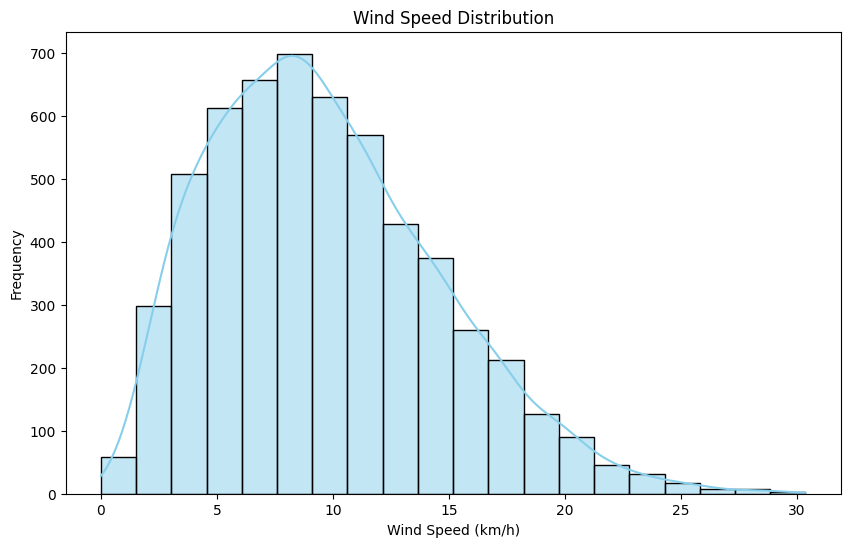

In [17]:
# Histogram for the /wind Speed
plt.figure(figsize=(10, 6))
sns.histplot(df['WIND'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.show()

- The given histogram illustrates the distribution of wind speed. The most common wind speeds are around 5-10 km/h, and the least common wind speeds are around 0 and above 25 km/h. This helps in understanding the typical wind patterns and identifying the range of wind speeds that are most and least frequent.

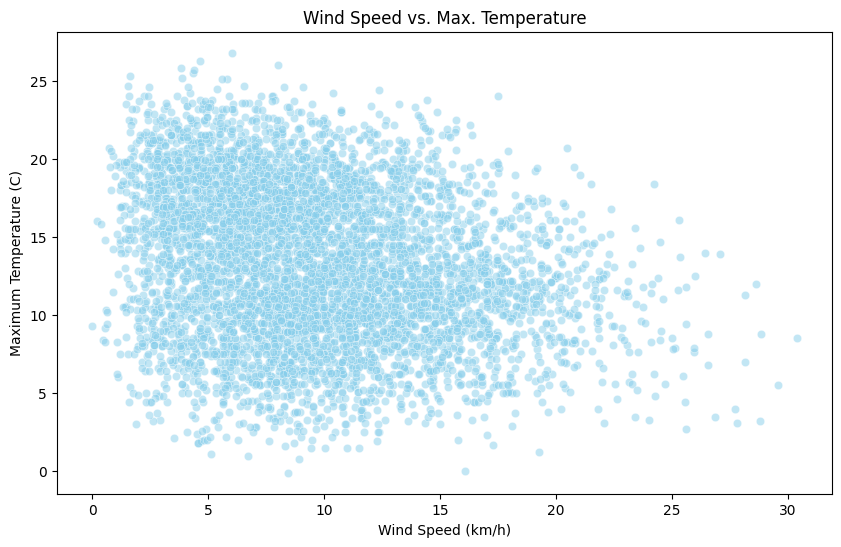

In [18]:
# Scatter plot showing relation between wind and rain
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WIND', y='T.MAX', data=df, alpha=0.5, color='skyblue')
plt.title('Wind Speed vs. Max. Temperature')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Maximum Temperature (C)')
plt.show()


- This scatter plot shows a weak negative relationship between wind speed (0-30 km/h) and maximum temperature (0-25°C).

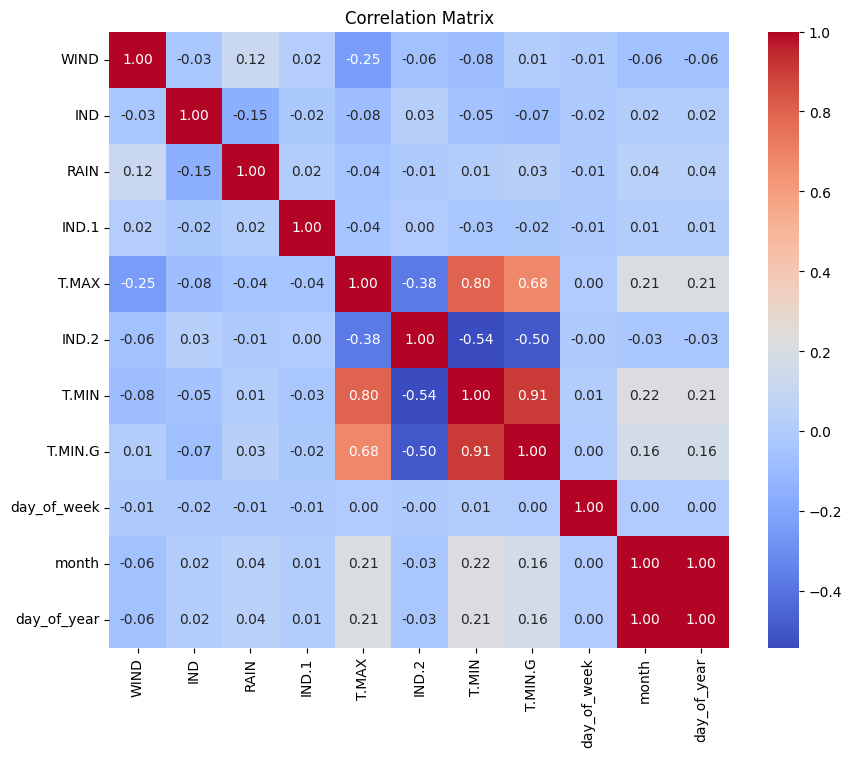

In [19]:
correlation=df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

- This heatmap shows correlations between variables. Values range from -1 (strong negative, blue) to +1 (strong positive, red). WIND has the strongest (though weak) negative correlation with T.MAX (-0.25) and a weak positive correlation with RAIN (0.12). Other correlations with WIND are near zero.

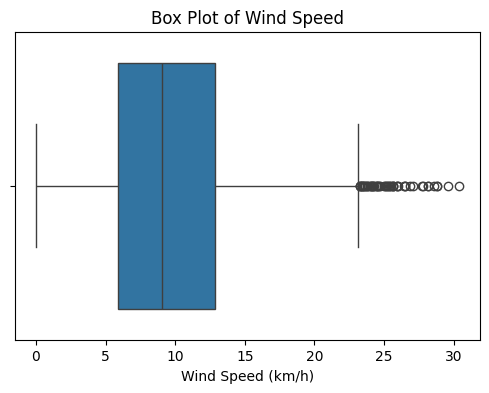

In [20]:
# Plot a box plot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['WIND'])
plt.title('Box Plot of Wind Speed')
plt.xlabel('Wind Speed (km/h)')
plt.show()

- This box plot shows wind speed distribution.  Most values are between about 8 and 13 km/h (the box).  The median is slightly above the center, and there are several high outliers above 25 km/h, with a maximum around 30 km/h.

- Outlier Detection

In [21]:
# Find the outliers for wind column
Q1 = df['WIND'].quantile(0.25)
Q3 = df['WIND'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['WIND'] < lower_bound) | (df['WIND'] > upper_bound)]

print("Number of outliers: ", outliers.shape[0])

Number of outliers:  54


In [22]:
# Filter out outliers
df = df[(df['WIND'] >= lower_bound) & (df['WIND'] <= upper_bound)]
print("Dataset size after dropping outliers: ", df.shape)

Dataset size after dropping outliers:  (5584, 11)


In [23]:
# Checking for outliers after dropping them
Q1 = df['WIND'].quantile(0.25)
Q3 = df['WIND'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['WIND'] < lower_bound) | (df['WIND'] > upper_bound)]

print("Number of outliers: ", outliers.shape[0])

Number of outliers:  10


# 2. Build a Model from Scratch [5]:
For the Regression task, build an appropriate model from scratch, such as Linear Regression, and report the
appropriate evaluation metrics on the train and test sets (e.g., Mean Squared Error, R-squared).


In [24]:
# Select features with high correlation to 'WIND' (above a threshold, e.g., 0.1)
selected = correlation.index[abs(correlation['WIND']) > 0.05]

# Now split the dataset into features (X) and target (y)
X = df[selected].drop(columns=['WIND'], axis=1)  # Select columns by name
y = df['WIND']

# 80:20 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
# Define functions for manual Linear Regression
def hypothesis(X, theta):
    """Compute the predicted values (hypothesis) for given input X and parameters theta."""
    return np.dot(X, theta)

def compute_cost(X, y, theta):
    """Compute the Mean Squared Error (MSE) cost function."""
    m = len(y)  # Number of training examples
    predictions = hypothesis(X, theta)
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

def gradient_descent(X, y, theta, learning_rate, epochs):
    """Perform gradient descent optimization to minimize the cost function."""
    m = len(y)  # Number of training examples
    cost_history = []  # Store cost at each iteration
    for _ in range(epochs):
        predictions = hypothesis(X, theta)
        theta -= (learning_rate / m) * np.dot(X.T, (predictions - y))  # Update parameters
        cost_history.append(compute_cost(X, y, theta))  # Track cost changes
    return theta, cost_history

X_train_bias = np.hstack((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled))
X_test_bias = np.hstack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))

# Initialize parameters (weights) to zero
theta = np.zeros(X_train_bias.shape[1])

# Train the model using gradient descent
learning_rate = 0.01
epochs = 5000
theta, cost_history = gradient_descent(X_train_bias, y_train, theta, learning_rate, epochs)

# Evaluate the trained model
y_pred = hypothesis(X_test_bias, theta)
mse = np.mean((y_pred - y_test) ** 2)  # Compute Mean Squared Error (MSE)
r2 = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - y.mean()) ** 2))  # Compute R² score

# Print the evaluation results
print("\nManual Linear Regression Results:")
print("MSE:", mse)
print("R²:", r2)



Manual Linear Regression Results:
MSE: 19.49826900561004
R²: 0.11339741528840153


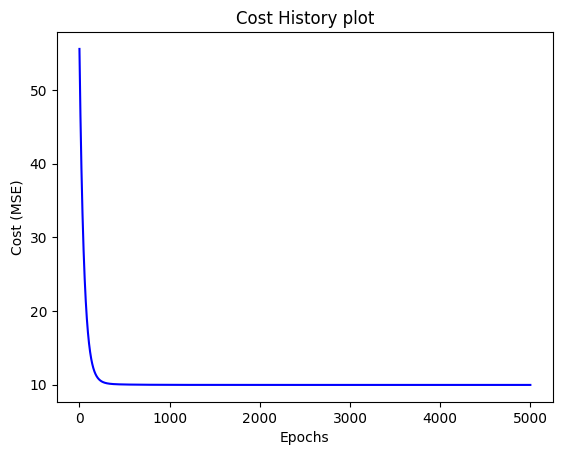

In [41]:
plt.plot(range(epochs), cost_history, color='blue')
plt.xlabel('Epochs')
plt.ylabel('Cost (MSE)')
plt.title('Cost History plot')
plt.show()

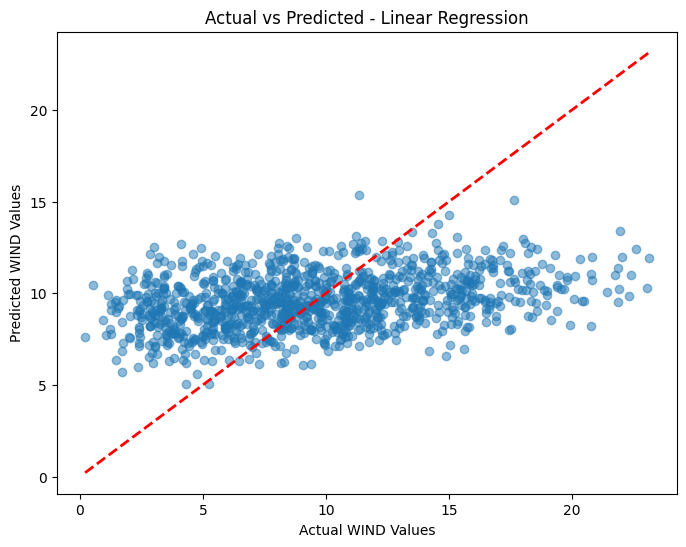

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # 45-degree line
plt.xlabel('Actual WIND Values')
plt.ylabel('Predicted WIND Values')
plt.title('Actual vs Predicted - Linear Regression')
plt.show()

#3. Build a Primary Model [5]:
After assembling your dataset and analyzing its key characteristics, the next step is to build, train, and
evaluate your models. Follow the steps below to complete this task:
1. Split the dataset into training and testing sets.


In [28]:
# Select features with high correlation to 'WIND' (above a threshold, e.g., 0.1)
selected = correlation.index[abs(correlation['WIND']) > 0.05]

# Now split the dataset into features (X) and target (y)
X = df[selected].drop(columns=['WIND'], axis=1)  # Select columns by name
y = df['WIND']

# 80:20 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


2. Build at least two different machine learning models for the regression task.
3. Evaluate both models on the test dataset using appropriate performance metrics (e.g., Mean
Absolute Error, Root Mean Squared Error, R-squared).


---Gradient Boosting---

Mean squared error:  17.080903865597154
R squared error:  0.22330960706521696


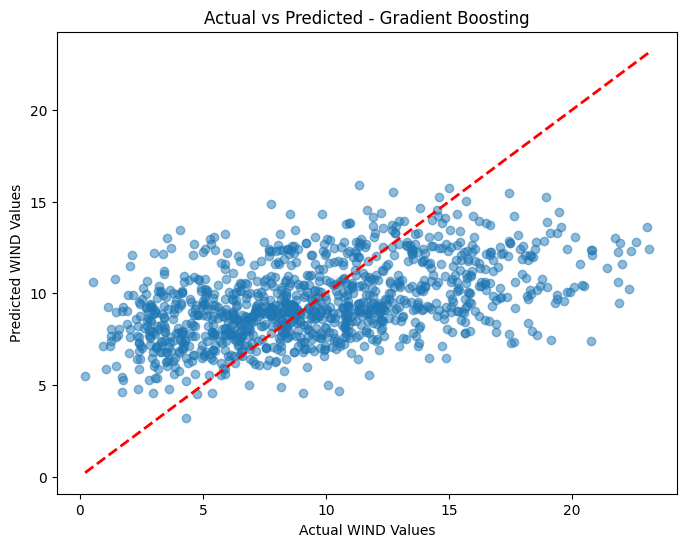

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import matplotlib.pyplot as plt

# Build the Gradient Boosting model with training data
gbr = GradientBoostingRegressor()
gbr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_gbr = gbr.predict(X_test_scaled)

# Calculate Mean Squared Error and R-squared
mse_gbr = metrics.mean_squared_error(y_test, y_pred_gbr)
print("Mean squared error: ", mse_gbr)

r2_error_gbr = metrics.r2_score(y_test, y_pred_gbr)
print("R squared error: ", r2_error_gbr)

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gbr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # 45-degree line
plt.xlabel('Actual WIND Values')
plt.ylabel('Predicted WIND Values')
plt.title('Actual vs Predicted - Gradient Boosting')
plt.show()


---Random Forest---

Mean squared error:  18.398246032347775
R squared error:  0.16340838560913995


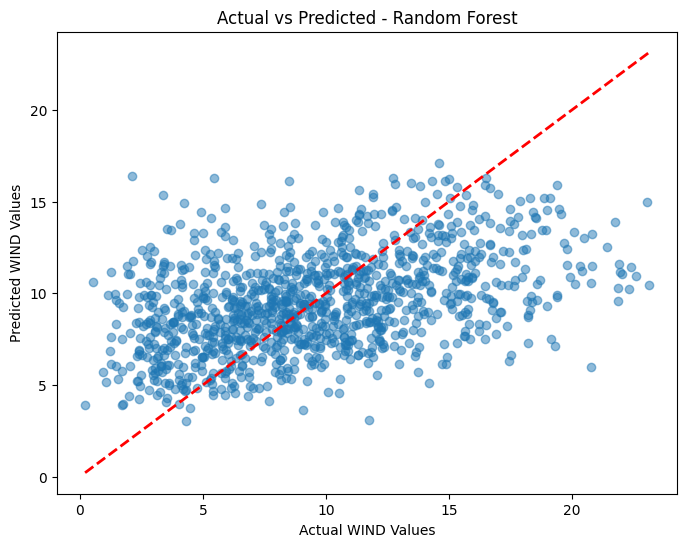

In [30]:
# Build the Random Forest model with training data
rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train_scaled, y_train)
# Make predictions on the dataset
y_pred_rf = rf_reg.predict(X_test_scaled)

# Calculate R2 and Mean squared error
mse_random=metrics.mean_squared_error(y_test,y_pred_rf)
print("Mean squared error: ",mse_random)

r2_error_random=metrics.r2_score(y_test,y_pred_rf)
print("R squared error: ",r2_error_random)

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # 45-degree line
plt.xlabel('Actual WIND Values')
plt.ylabel('Predicted WIND Values')
plt.title('Actual vs Predicted - Random Forest')
plt.show()

4. Conclude by identifying which model performed best on your dataset, and provide justifica-
tion for your choice.

In [31]:
# Check which model performs better
if (r2_error_gbr > r2_error_random):
    print("Gradient Boosting performs better.")
elif( r2_error_random > r2_error_gbr):
    print("Random Forest performs better.")
else:
    print("Both models have similar performance.")

Gradient Boosting performs better.


#4. Hyper-parameter Optimization with Cross-Validation [2.5]:
Hyper-parameter optimization, also known as hyper-parameter tuning, is the process of identifying the best
hyper-parameter values for your selected models. Follow the steps below to perform this task:
1. Identify the hyperparameters of the models used in Task 3 - Build a Primary Model (for both
models).
2. Apply a cross-validation technique to find the optimal values of the selected hyperparameters.
• Hint: You can use techniques like GridSearchCV or RandomizedSearchCV.


In [32]:
# Define the hyperparameter grid
param_dist_gbr = {
    'n_estimators': [100, 300, 500, 800],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9]
}

# Initialize Gradient Boosting Regressor
gbr = GradientBoostingRegressor()

# Apply RandomizedSearchCV
random_search_gbr = RandomizedSearchCV(estimator=gbr, param_distributions=param_dist_gbr,
                                       n_iter=20, cv=5, scoring='r2', n_jobs=-1, random_state=42)
random_search_gbr.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'min_samples_leaf': [1, 3, 5],
                                        'min_samples_split': [5, 10, 20],
                                        'n_estimators': [100, 300, 500, 800],
                                        'subsample': [0.7, 0.8, 0.9]},
                   random_state=42, scoring='r2')

In [33]:
# Define the hyperparameter grid for Random Forest
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Perform RandomizedSearchCV with defined parameter distribution
random_search_rf = RandomizedSearchCV(rf_reg, param_dist_rf, n_iter=10, cv=3, scoring='r2', n_jobs=-1, random_state=42)
# Fit RandomizedSearchCV on training data
random_search_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='r2')


3. Conclude by summarizing the best hyperparameters for both models.

In [34]:
# Best hyperparameters for Linear Regression
best_params_gbr = random_search_gbr.best_params_
print("Best hyperparameters for Gradient Boosting:", best_params_gbr)

# Get the best hyperparameters
best_params_rf = random_search_rf.best_params_
print("Best hyperparameters for Random Forest:",best_params_rf)

Best hyperparameters for Gradient Boosting: {'subsample': 0.8, 'n_estimators': 800, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_depth': 3, 'learning_rate': 0.01}
Best hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}


# 5. Feature Selection [2.5]:
In this section, apply one of the feature selection techniques discussed in the Week-10 tutorial to identify and
select the most relevant features for your models. Clearly document your process and justify your choice of
features.

In [35]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Get feature importances from Random Forest
rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
rf_feature_names = rf_feature_importances.sort_values(ascending=False).index.tolist()

print("Random Forest Selected Features:")
print(rf_feature_names)

# Train Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Get feature importances from Gradient Boosting
gb_feature_importances = pd.Series(gb_model.feature_importances_, index=X_train.columns)
gb_feature_names = gb_feature_importances.sort_values(ascending=False).index.tolist()

print("\nGradient Boosting Selected Features:")
print(gb_feature_names)


Random Forest Selected Features:
['T.MAX', 'day_of_year', 'T.MIN', 'RAIN', 'month', 'IND.2']

Gradient Boosting Selected Features:
['RAIN', 'day_of_year', 'T.MAX', 'T.MIN', 'month', 'IND.2']


# 6. Final Model [2.5]:
Using the optimal hyperparameters identified in Task - 4 and the selected features from Task - 5, rebuild
both models from Task - 3. Evaluate the performance of the final models and provide a summary of your
findings.

Gradient Boosting Model:
Mean squared error:  17.019265720797694
R squared error:  0.22611237179480992


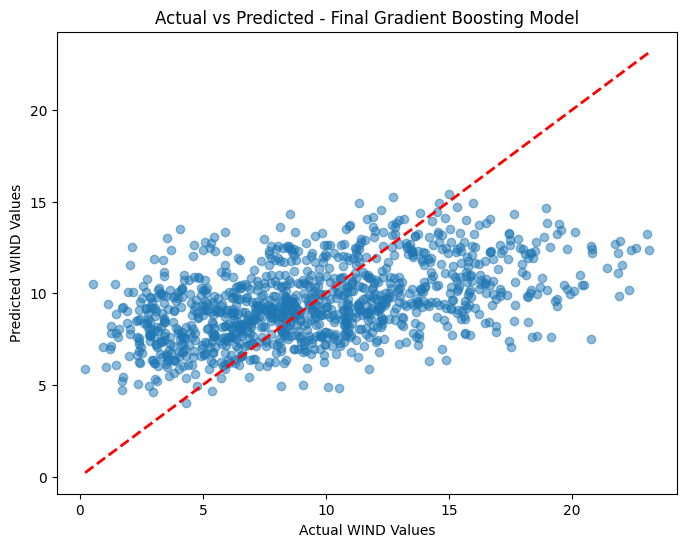

In [38]:
# Rebuilding the final model with the best hyperparameters and selected features
final_gbr = GradientBoostingRegressor(**best_params_gbr)
final_gbr.fit(X_train[gb_feature_names], y_train)

y_pred_gbr_final = final_gbr.predict(X_test[gb_feature_names])
print("Gradient Boosting Model:")
mse_gbr_final = metrics.mean_squared_error(y_test, y_pred_gbr_final)
print("Mean squared error: ", mse_gbr_final)
r2_error_gbr_final = metrics.r2_score(y_test, y_pred_gbr_final)
print("R squared error: ", r2_error_gbr_final)

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gbr_final, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # 45-degree line
plt.xlabel('Actual WIND Values')
plt.ylabel('Predicted WIND Values')
plt.title('Actual vs Predicted - Final Gradient Boosting Model')
plt.show()

# 7. Conclusion [2.5]:
Provide a brief summary of the outcomes of your experiment by addressing the following points:
1. Model Performance: How did your models perform? Discuss the key results and metrics (e.g., Mean Squared Error, R-squared, etc.).

  a.   Model from scratch:
  *   R-squared Error: 0.113
  *   Mean Squared Error: 19.498

  b.   Gradient Boosting Model:
  *   R-squared Error: 0.223
  *   Mean Squared Error: 17.08

  c.   Random Forest:
  *   R-squared Error: 0.163
  *   Mean Squared Error: 18.398

  d.   Final Gradient Boosting:
  *   R-squared Error: 0.226
  *   Mean Squared Error: 16.99

  The models performed poorly because the features do not have strong relationship with the target variable "WIND".


2. Impact of Methods: Analyze the effect of the techniques you applied, such as Cross-Validation and Feature Selection. Did these methods improve or reduce model performance? Provide a brief
explanation.
  *   Cross-Validation: Using RandomizedSearchCV for hyperparameter tuning allowed us to find the best hyperparameters for both models, which led to improved performance over the default settings
  *   Feature Selection: While the feature selection process did improve the models by removing irrelevant or weakly correlated features, the overall performance still remained limited.


3. Insights and Future Directions: Reflect on what you learned from the experiment. What insights can be drawn from your analysis, and what potential improvements or extensions could be explored in
future work?
  *   Insights: Time-based features (day, month, hour) improved the models but performance remained low, indicating other factors might be influencing wind speed.
  *   Future Directions: Additional feature engineering, such as including external factors (e.g., geography, weather), could improve predictions.


